In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
sample_submission = pd.read_csv("E:\\Downloads\\sample_submission_loan.csv")

In [4]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [6]:
#getting the train & test dataset
train = pd.read_csv("E:\\Downloads\\train_ctrUa4K.csv")
test = pd.read_csv("E:\\Downloads\\test_lAUu6dG.csv")

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
train.columns.difference(test.columns)

Index(['Loan_Status'], dtype='object')

In [10]:
train.shape

(614, 13)

In [12]:
test.shape

(367, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [15]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<AxesSubplot:>

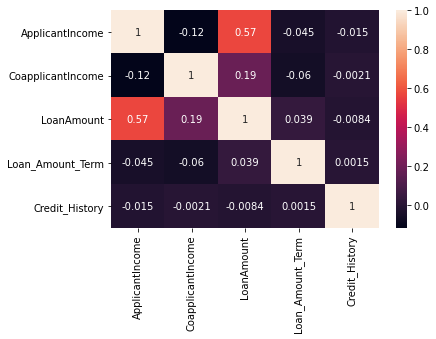

In [17]:
#EDA
corr_ = train.corr()
sns.heatmap(corr_,annot = True)
#There is a postive correlation between the applicant's income and the loan amount 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

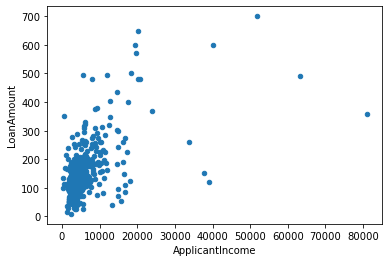

In [20]:
train.plot(kind = 'scatter', x = 'ApplicantIncome', y = 'LoanAmount')

In [21]:
#add a column called 'Source' to both the datasets
train['source'] = 'train'
test['source'] = 'test'

In [22]:
train[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train


In [23]:
test[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test


In [24]:
#concatenate both train & test dataset into one
df = pd.concat([train,test])
df[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train


In [25]:
df.shape

(981, 14)

In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [30]:
numerical_columns = df.select_dtypes(include=np.number)

In [33]:
categorical_columns = df.select_dtypes(exclude = np.number).drop(columns = ['Loan_ID','Loan_Status']).columns

In [34]:
#find the unique values in categorical columns
df[categorical_columns].apply(lambda x : x.nunique())

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
source           2
dtype: int64

In [35]:
#fetch the value counts of each categorical column
df[categorical_columns].apply(lambda x: print(x.value_counts()))

Male      775
Female    182
Name: Gender, dtype: int64
Yes    631
No     347
Name: Married, dtype: int64
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
No     807
Yes    119
Name: Self_Employed, dtype: int64
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
train    614
test     367
Name: source, dtype: int64


Gender           None
Married          None
Dependents       None
Education        None
Self_Employed    None
Property_Area    None
source           None
dtype: object

In [37]:
numerical_columns = numerical_columns.columns
df[numerical_columns].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
dtype: int64

In [38]:
df[categorical_columns].isna().sum()

Gender           24
Married           3
Dependents       25
Education         0
Self_Employed    55
Property_Area     0
source            0
dtype: int64

In [43]:
#FILL THE NULL VALUES of numerical columns  WITH THE MEAN VALUE
df['Credit_History'] = df['Credit_History'].transform(lambda x: x.fillna(x.mean()))
df['LoanAmount'] = df['LoanAmount'].transform(lambda x: x.fillna(x.mean()))
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].transform(lambda x: x.fillna(x.mean()))

In [39]:
df['Credit_History'].mean()

0.835920177383592

In [44]:
#FILL THE NULL VALUES of categ columns  WITH THE mode  VALUE
df['Gender'] = df['Gender'].transform(lambda x: x.fillna(x.mode()[0]))
df['Self_Employed'] = df['Self_Employed'].transform(lambda x: x.fillna(x.mode()[0]))
df['Dependents'] = df['Dependents'].transform(lambda x: x.fillna(x.mode()[0]))
df['Married'] = df['Married'].transform(lambda x: x.fillna(x.mode()[0]))


In [45]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [66]:
X = df.select_dtypes(include=np.number)
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,ApplicantIncome
1,CoapplicantIncome
2,LoanAmount
3,Loan_Amount_Term
4,Credit_History


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,ApplicantIncome,2.808183
1,CoapplicantIncome,1.482018
2,LoanAmount,6.873056
3,Loan_Amount_Term,7.902722
4,Credit_History,5.504945


In [52]:
df_numbers = df.select_dtypes(include=np.number)
df_categories = df.select_dtypes(exclude = np.number).drop(columns = ['Loan_ID','Loan_Status','source'])
#encode the categorical columns
df_categories_encoded = pd.get_dummies(df_categories)
df_final = pd.concat([df_numbers,df_categories_encoded,df[['Loan_ID','Loan_Status','source']]],axis = 1)
df_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status,source
0,5849,0.0,142.51153,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001002,Y,train
1,4583,1508.0,128.00000,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,LP001003,N,train
2,3000,0.0,66.00000,360.0,1.0,0,1,0,1,1,...,1,0,0,1,0,0,1,LP001005,Y,train
3,2583,2358.0,120.00000,360.0,1.0,0,1,0,1,1,...,0,1,1,0,0,0,1,LP001006,Y,train
4,6000,0.0,141.00000,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001008,Y,train


In [51]:
df_categories = df.select_dtypes(exclude = np.number).drop(columns = ['Loan_ID','Loan_Status','source'])
pd.get_dummies(df_categories)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [54]:
#export the preprocessed data
df_final.to_excel("Pre_processed_data_loan.xlsx",index = False)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [56]:
df_processed = pd.read_excel("Pre_processed_data_loan.xlsx")

In [57]:
df_processed.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status,source
0,5849,0.0,142.51153,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001002,Y,train
1,4583,1508.0,128.00000,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,LP001003,N,train
2,3000,0.0,66.00000,360.0,1.0,0,1,0,1,1,...,1,0,0,1,0,0,1,LP001005,Y,train
3,2583,2358.0,120.00000,360.0,1.0,0,1,0,1,1,...,0,1,1,0,0,0,1,LP001006,Y,train
4,6000,0.0,141.00000,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001008,Y,train


In [58]:
#fetch train & test data
train_preprocessed = df_processed.loc[df_processed['source']=='train']
test_preprocessed = df_processed.loc[df_processed['source']=='test']

In [59]:
train_preprocessed.shape,test_preprocessed.shape

((614, 23), (367, 23))

In [60]:
del train_preprocessed['source']

In [61]:
del test_preprocessed['source']

In [62]:
#exclude the columns shown in sample submission
X_train = train_preprocessed.drop(columns = ['Loan_ID','Loan_Status'])
X_test = test_preprocessed.drop(columns = ['Loan_ID','Loan_Status'])
# fetch the target prediction
train_y = train_preprocessed['Loan_Status']
test_y = test_preprocessed['Loan_Status']

In [65]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,142.51153,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.00000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.00000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.00000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.00000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.00000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.00000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.00000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.00000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [82]:
X_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
614,5720,0.0,110.0,360.0,1.00000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
615,3076,1500.0,126.0,360.0,1.00000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
616,5000,1800.0,208.0,360.0,1.00000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
617,2340,2546.0,100.0,360.0,0.83592,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
618,3276,0.0,78.0,360.0,1.00000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,113.0,360.0,1.00000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
977,4158,709.0,115.0,360.0,1.00000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
978,3250,1993.0,126.0,360.0,0.83592,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
979,5000,2393.0,158.0,360.0,1.00000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [68]:
from sklearn.linear_model import LogisticRegression 

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
train_y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [80]:
test_y

614    NaN
615    NaN
616    NaN
617    NaN
618    NaN
      ... 
976    NaN
977    NaN
978    NaN
979    NaN
980    NaN
Name: Loan_Status, Length: 367, dtype: object

In [74]:
lr = LogisticRegression()
lr.fit(X_train,train_y)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
#pred_test = abs(pred_test)

In [76]:
sample_submission['Loan_Status'] = pred_test

In [79]:
#export the submission as a csv file
sample_submission.to_csv("E:\\Downloads\\Submission_AswinRaam_loan.csv",index = False)